- K-Means 알고리즘은 분류뿐만 아니라 회귀에서도 사용할 수 있음
    - `KNeighborClassifier`가 아니라 `KNeighborRegressor`로
    - 이웃 수치를 통해 새로운 데이터 샘플의 수치값을 예측하는 식으로 → 이웃 샘플들에 대한 수치값의 평균값 사용
    - e.g. 이웃 샘플들의 타겟값 `[100, 80, 60]`일 경우, 새로운 데이터의 타겟값은 80

---
# 데이터 준비

- 준비된 데이터는 농어의 길이, 높이, 두께 세 개의 피쳐
    - 일단 농어의 길이 하나만으로 농어의 무게를 예측하는 문제부터 생각해보자.

In [9]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

len(perch_length)

56

### 농어 "길이에 대한 무게" 산점도
- 농어의 길이와 무게의 상관관계를 예측해보자

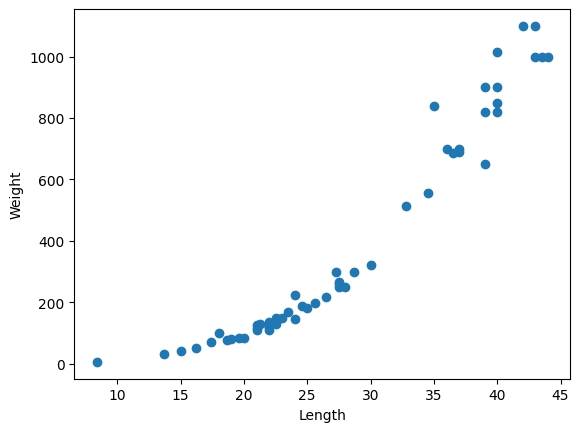

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

### train set, test set으로 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split( # input: 길이 / target: 몸무게
        perch_length, perch_weight, random_state=42 # 길이, 몸무게 모두 42:14 비율로 분할
    )


### 각 데이터 2차원 배열로 모양 바꾸기

In [14]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(42,)
(14,)
(42,)
(14,)


- AI/ML에서 보통 데이터를 2차원으로 표현하는 이유는, `각 데이터 샘플(행)x해당 데이터 샘플의 피쳐(열)` 형태로 표현할 때 수학적으로 표현하고 처리하기에 가장 효과적인 형태이므로

In [16]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(42, 1)
(14, 1)
(42, 1)
(14, 1)


---
# 예측 점수
- 분류의 경우, 레이블을 정확히 예측한 개수(Accuracy)를 세면 모델의 성능을 측정할 수 있음
- 회귀의 경우, 레이블값을 정확히 예측하는건 불가능 → 결정계수($R^2$)활용
    - 결정 계수($R^2$) = $1 \;-\; \frac{\displaystyle \sum_{i=1}^n \bigl(y_i - \hat y_i\bigr)^2}
                           {\displaystyle \sum_{i=1}^n \bigl(y_i - \bar y\bigr)^2}$
- 사이킷런의 `.score()`는 정확도든, 결정 계수든 일단 높을수록 좋은 값이다.  
    - 결정 계수가 0에 가깝다는 것은, 어떤 데이터가 들어오든 전체 값의 평균값정도로만 예측한다는 것(분자값이 분모와 거의 동일해져, 뺴는 값이 1에 가까워지고, 따라서 결정 계수값은 0에 가까워짐)
    - 결정 계수가 1에 가깝다는 것은, 예측값이 ground truth값과 거의 동일하다는 것(분자를 0에 가깝게 만들어 전체 값이 1에 가까워짐)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target) # 학습

print("Test Score: ", knr.score(test_input, test_target)) # 예측 점수

Test Score:  0.992809406101064


- 결정 계수가 높으면 좋긴 하지만, 값이 높아도 정확도처럼 직관적으로 보이지 않음(얼마나 좋은 성능을 나타내는건지 감이 안옴)
- 타겟과 예측값 사이의 차이를 구해보자

In [22]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input) # 테스트 셋에 대해 예측 결과 저장

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


👉 (무게)예측값이 평균적으로 19g정도 오차가 존재

---
# train 셋을 잘 학습하긴 했을까?
- train 셋에 대해 score를 내보자. 이 때, 
    1. test 셋의 점수가 train 셋보다 점수가 높거나,
    2. 두 점수 모두 낮을 경우 언더피팅이 일어난 것이다.

In [23]:
print(knr.score(train_input, train_target))

0.9698823289099254


👉 train 셋이 오히려 결정 계수가 작음 → Underfitting!

---
# Underfitting을 해결할 수 있는 방법
- K-Neightbor 알고리즘에서 이웃의 개수(k) 디폴트값은 5 → 이 값을 낮춰서 좀 더 국소적인 패턴을 따르도록(train셋의 패턴에 더 디테일하게 따르도록)만들어준다.
    - k값을 낮추는 것은 모델의 복잡도를 올리는것.
    - 즉 정리해서 표현하면, "언더피팅이 발생했을 때는 모델의 복잡성을 높여서 해결한다"

In [24]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [25]:
print(knr.score(test_input, test_target))

0.9746459963987609


---
# 참고
- n값에 따른 예측 그래프 살펴보기

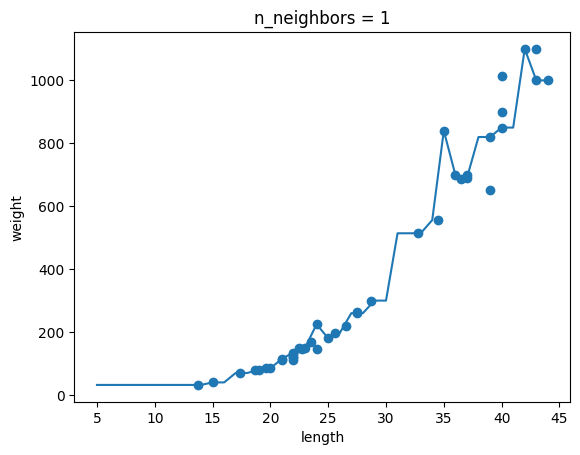

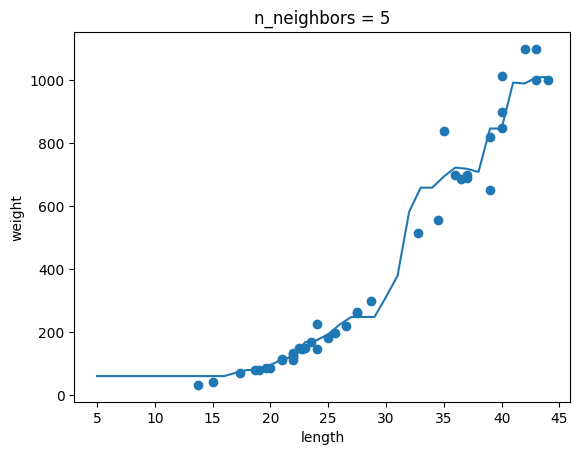

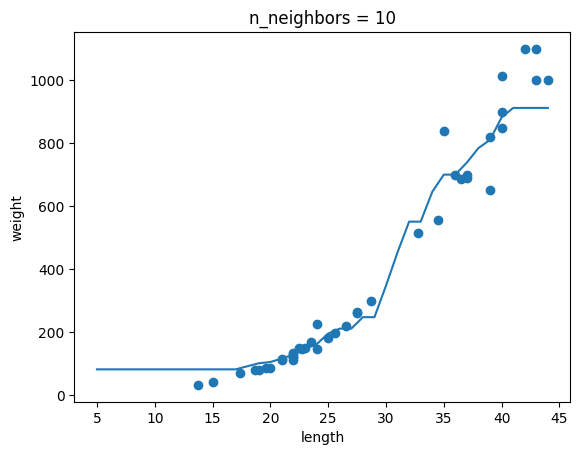

In [27]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    pred = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, pred)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()


n값이 클수록 참고하는 주변 이웃 샘플의 개수가 많은 것이기 때문에, 훈련 셋의 '전반적인 경향성'을 학습하는것이 됨

---
# QA

- KNeighborRegressor에서, k값을 높여야 모델의 복잡도가 높아지는것 아닌가요?
    - k값을 낮추는것은 고려해야하는 이웃 샘플의 개수가 적어지는것입니다. 반대로 k값이 높다면 고려해야하는 이웃의 개수가 많아지고, 더 많은 이웃에 대한 평균을 내야하므로 여러 샘플에 의해 영향을 고르게 받게 되고, 더 보수적으로 예측할수밖에 없게 됩니다. 즉 눈치를 봐야할 대상이 많아지기때문에 표현력이 낮아지게되는것입니다. 따라서 k값을 낮춰야 눈치볼 대상이 적어지고, 결과적으로 모델이 눈치보지않고 더 풍부하게 표현할 수 있게되는 것입니다.
    - 즉, 정리하면, 언더피팅이 발생하면, k값을 낮춰서 "(극단적으로 표현하면)오버피팅쪽으로 가깝게 만들어주는" 것 입니다.

- 오버피팅이 일어나는 이유와, 오버피팅이 일어나면 성능이 안좋아지는 이유?
    - 모델이 훈련 데이터셋을 과하게 학습하면 오버피팅이 일어나게됩니다. 과하게 학습했다는 것은 훈련셋이 가지고있는 노이즈나, 특이한 패턴까지 학습했다는것을 의미합니다. 또한, 오버피팅이 일어나면 성능이 안좋아지는 이유는, 테스트셋이 훈련셋과 100% 일치하는 데이터가 아니기 때문입니다. 오버피팅이 일어나게되면 모델은 훈련셋만의 노이즈 및 특이한 패턴을 일반화시켜서, 모든 데이터가 그렇다고 판단하게 되고, 결과적으로 성능이 떨어지게 됩니다.

- 언더피팅은 무엇이고, 해결하는 방법은?
    - 언더피팅이란 모델이 너무 단순하거나, 모델이 학습 데이터조차 충분히 학습하지 못한 상태를 의미합니다. 이 경우에 보통  테스트셋에 대한 점수뿐만 아니라, 훈련셋에 대한 점수 또한 낮게 나옵니다. 언더피팅을 해결하기 위해서는 절대적인 학습량(에폭 수, 훈련 데이터의 수)을 늘리거나, 모델의 복잡도를 늘리거나, 경우에 따라서 피쳐 엔지니어링 및 정규화 완화를 통해서도 해결할 수 있습니다.
    - 언더피팅이 일어나는 이유는 그밖에도 학습률이 너무 크거나, 피쳐 수가 모자라거나, 전처리를 잘못했거나, 정규화를 너무 과하게 했거나 .. 이러한 경우에도 언더피팅이 발생합니다.

- 모델의 복잡도를 늘리면 어떻게 언더피팅이 해결되는것인지 자세히 설명해주세요.
    - 모델의 복잡도를 늘린다는 것은 모델의 표현력을 높인다는 것을 의미합니다. 모델의 복잡도가 높아지면 더 다양한 형태의 함수를 학습할 수 있게되고, 이를 통해 데이터의 더욱 복잡한 패턴에 대해서도 잡아낼 수 있게됩니다. 예를 들어 선형 회귀 모델에서, 데이터가 곡선 형태로 분포되어있음에도 모델이 직선밖에 표현하지 못한다면 성능이 떨어지는데, 모델이 곡선을 표현할 수 있도록 만든다면(즉, 복잡도를 높인다면) 모델이 데이터를 더 잘 표현할 수 있게되어 성능이 향상됩니다.
    - 다만 복잡도를 너무 높게 만든다면, 반대로 오버피팅이 발생할수도 있기때문에 적절하게 설계하는것이 중요합니다.